### Introduction to Regression Tree Model to predict target values
1. Regression tree model is a type of decision tree model where we predict the target value which is continuous in nature. 
2. Continuous Target: - `Prediction of Salary, temperature, stock price`

### Basic understanding on how Regression tree works under the hood 
1. Build the Regression Partition: Sample ---> $R_1, R_2, R_3, R_4, ..., R_n$
2. Choose the splitting feature: - Minimize the mean variance of each region 
3. Stopping Criteria (Pruning): - Max_depth method to stop a leaf of tree 
4. Predicting value based on `rectangular` splitted region 

In [1]:
#Importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

### About dataset 
- The dataset includes information about taxi tip and was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). You will use the trained model to predict the amount of tip paid. 

In [3]:
#Data Collection
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv"
df = pd.read_csv(url)
df.head(10)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
5,2,1,18.90,2,1,132,211,1,70.0,0.5,0.00,1,8.00
6,2,1,19.37,2,1,132,158,1,70.0,0.5,0.00,1,7.58
7,2,3,17.35,2,1,132,161,1,70.0,0.5,6.94,1,16.19
8,2,1,17.03,2,1,132,170,1,70.0,0.5,6.94,1,16.19
9,2,1,20.42,2,1,132,141,1,70.0,0.5,6.94,1,20.23


<Axes: >

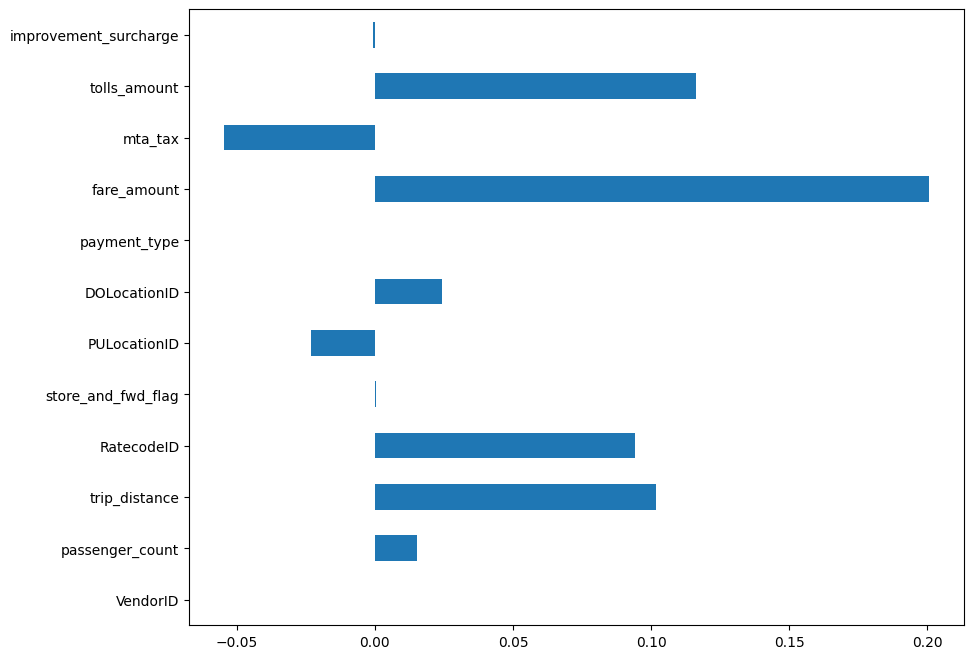

In [9]:
#Understand correlation between target and explainatory variables 
data_correlation = df.corr()['tip_amount'].drop(['tip_amount'])

#visualization of relation of each variable with tip_ammount (target variable)
data_correlation.plot(kind= 'barh', figsize= (10, 8))

- From this plot we can conclude that `tip_amount` is not having any relation with features `improvement_surcharge`, `mta_tax`, `payment_type`, `PULocationID`, `store_and_fwd_flag`, `VendorID`. 

- So, better we can remove these feturese and clean our dataset 

In [11]:
#Data Cleaning 
df = df.drop(['improvement_surcharge', 'mta_tax', 'payment_type', 'PULocationID', 'store_and_fwd_flag', 'VendorID'], axis= 1)
df.head(10)

,passenger_count,trip_distance,RatecodeID,DOLocationID,fare_amount,tolls_amount,tip_amount
0,1,17.63,2,164,70.0,6.94,16.54
1,1,19.52,2,236,70.0,6.94,16.19
2,1,17.81,2,48,70.0,6.94,12.00
3,2,19.30,2,148,70.0,0.00,5.00
4,1,18.75,2,234,70.0,6.94,10.00
5,1,18.90,2,211,70.0,0.00,8.00
6,1,19.37,2,158,70.0,0.00,7.58
7,3,17.35,2,161,70.0,6.94,16.19
8,1,17.03,2,170,70.0,6.94,16.19
9,1,20.42,2,141,70.0,6.94,20.23


In [12]:
#Check of null values and information on the dataset 
print(df.isnull().sum())
print(df.info())

passenger_count    0
trip_distance      0
RatecodeID         0
DOLocationID       0
fare_amount        0
tolls_amount       0
tip_amount         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  41202 non-null  int64  
 1   trip_distance    41202 non-null  float64
 2   RatecodeID       41202 non-null  int64  
 3   DOLocationID     41202 non-null  int64  
 4   fare_amount      41202 non-null  float64
 5   tolls_amount     41202 non-null  float64
 6   tip_amount       41202 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.2 MB
None


### Data Preprocessing: - 
1. In this model, we are using `Normalization` as a feature selction process (other than standarize feature)
2. Normalization, formula mathematically
    - Normalization ($x_i$) = $x(bar)_i - min(x_i) / max(x_i) - min(x_i)$
---
3. Normalization rescales each row (or column) of your data so that it has a unit norm.
    - X → input data (2D array, e.g. samples × features).
    - axis=1 → normalize each row (sample).
    - norm='l1' → use the L1 norm (sum of absolute values).
    - copy=False → overwrite X instead of creating a copy (Memory utilizaiton).

In [17]:
#Data Preprocessing 
from sklearn.preprocessing import normalize

Y = df[['tip_amount']].values.astype('float32')

X = df.drop(['tip_amount'], axis= 1).values

#Apply normalization into selected features to make them comparable 
normalize_x = normalize(X, axis=1, norm= 'l1', copy= False)

In [18]:
#Model Selection 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalize_x, Y, test_size= 0.2, random_state= 42)

In [19]:
#Model Development 
from sklearn.tree import DecisionTreeRegressor

#Regression tree 
regressor_tree = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 8, random_state= 35)

#Fit the model on training dataset 
regressor_tree.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,35
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [24]:
#Model Prediction and Evaluation 
from sklearn.metrics import mean_squared_error

y_predict = regressor_tree.predict(x_test)

#Model Evaluation
print(f"Mean Squared Error: {np.round(mean_squared_error(y_test, y_predict), 3)}")
print(f"R^2 Score: {np.round(regressor_tree.score(x_test, y_test), 3)}")

Mean Squared Error: 25.544
R^2 Score: 0.016
